In [1]:
import sys
import os
from dotenv import load_dotenv
load_dotenv()
sys.path.append(os.getenv("PATH_CUSUM"))

from source.generator.change_point_generator import ChangePointGenerator
from source.detector.cusum import CUSUM_Detector, ProbCUSUM_Detector, ChartCUSUM_Detector

# Abrupt Mean Shift

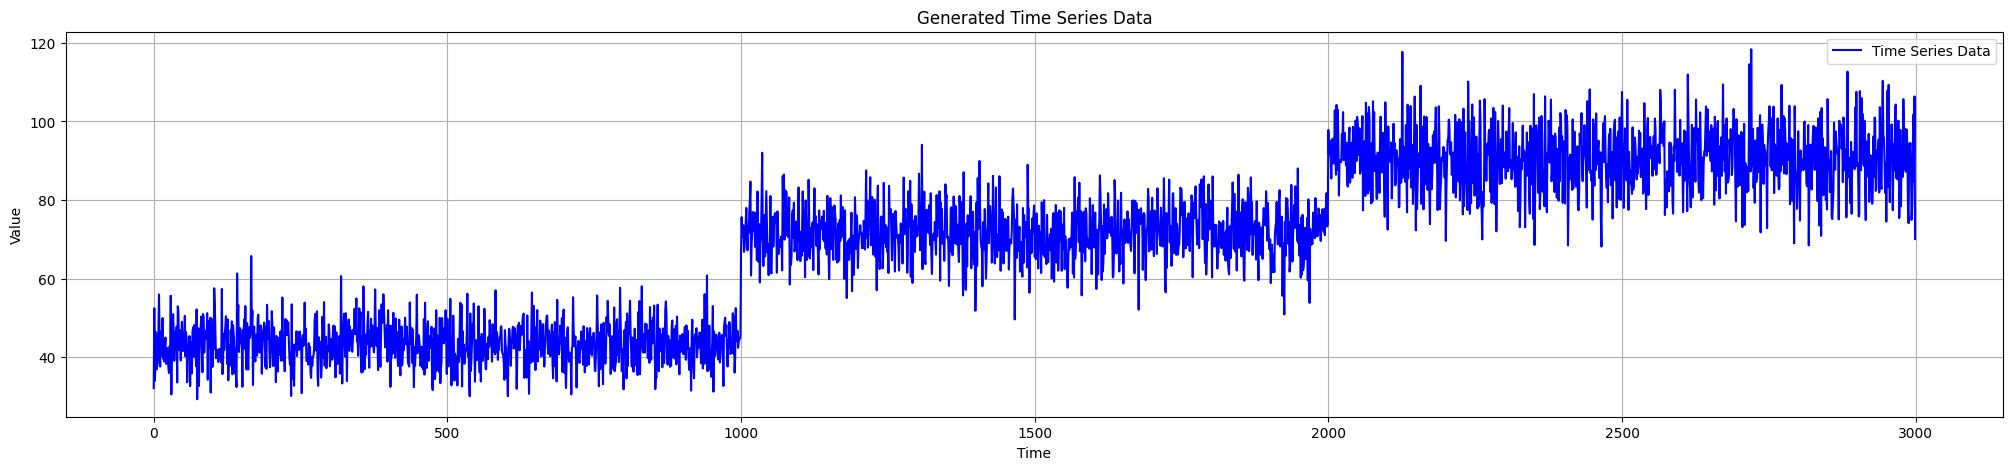

In [2]:
# Generate time series data with change points
generator = ChangePointGenerator(num_segments=3, 
                                 segment_length=1000, 
                                 change_point_type='sudden_shift', 
                                 seed=2)
generator.generate_data()

# Plot the generated data
generator.plot_data()

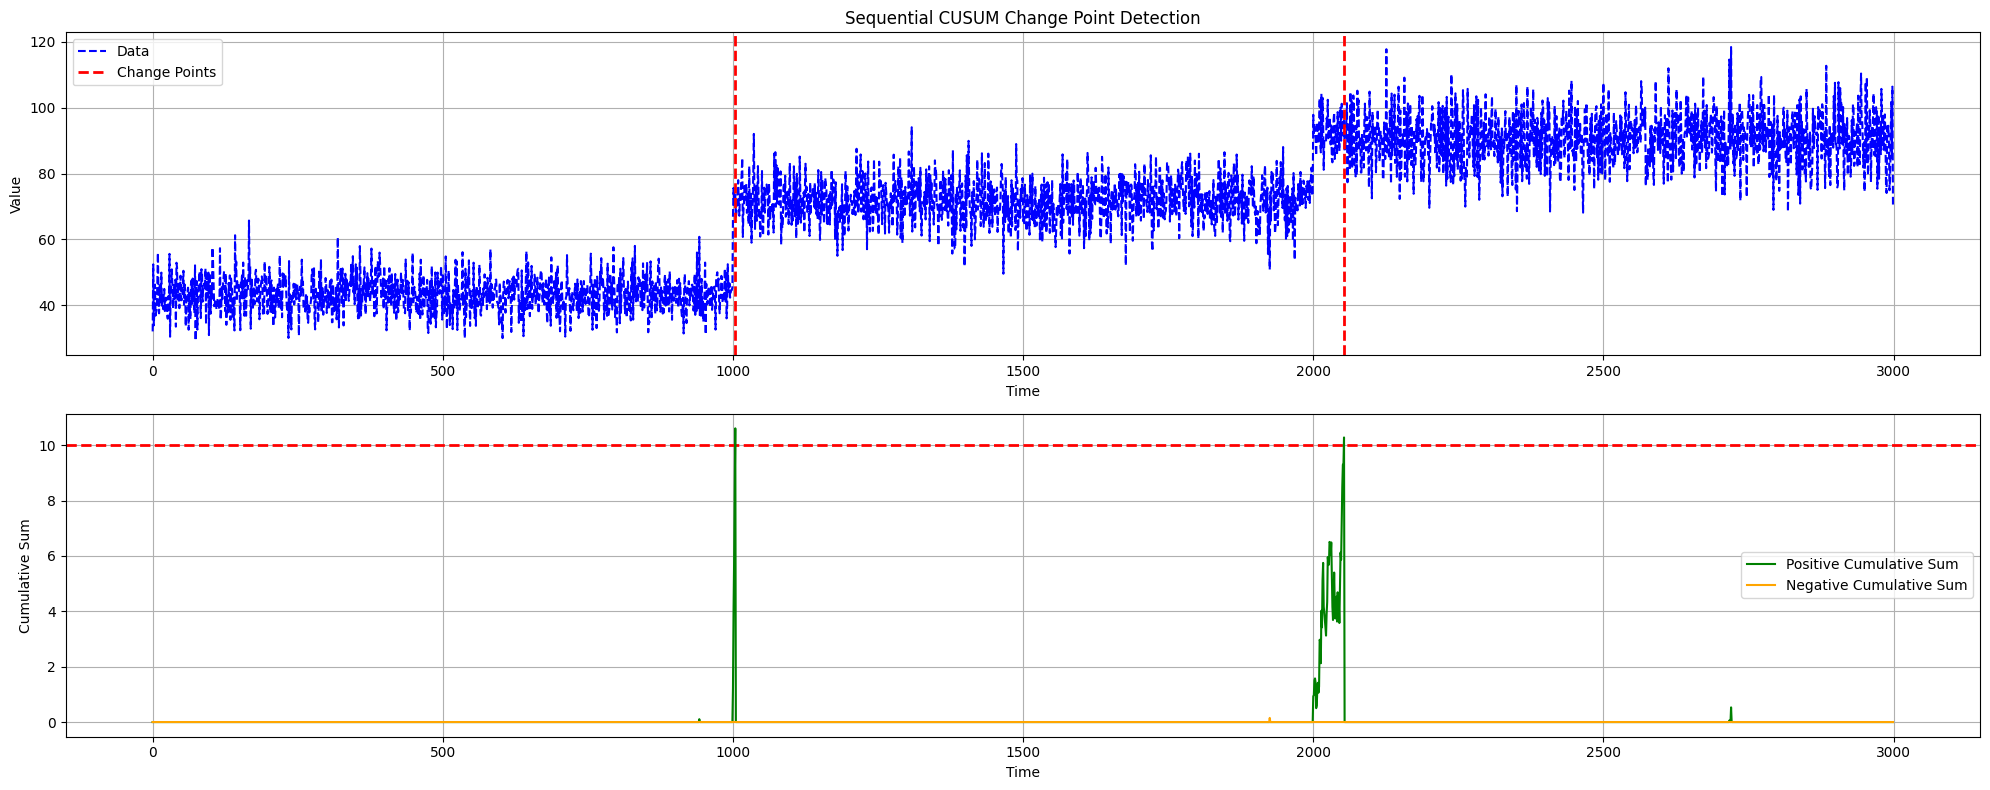

In [5]:
# Detect change points using CUSUM Detector
cusum_detector = CUSUM_Detector(warmup_period=500, delta=3, threshold=10)
results = cusum_detector.offline_detection(generator.data)

# Plot the detected change points using CUSUM Detector
cusum_detector.plot_change_points(generator.data, 
                                  results["change_points"], 
                                  results["pos_changes"], 
                                  results["neg_changes"]) 


In [6]:
for data in generator.data:
    pos, neg, is_change = cusum_detector.detection(data)
    print(f"Change Detected: {is_change} \n -Positives: {pos[0]}, \n -Negatives: {neg[0]}")

Change Detected: False 
 -Positives: 0, 
 -Negatives: 4.214028231984597
Change Detected: False 
 -Positives: 0, 
 -Negatives: 5.894914148278396
Change Detected: False 
 -Positives: 0, 
 -Negatives: 9.879028766485021
Change Detected: True 
 -Positives: 0, 
 -Negatives: 13.22477907183153
Change Detected: False 
 -Positives: 0, 
 -Negatives: 0
Change Detected: False 
 -Positives: 0, 
 -Negatives: 0
Change Detected: False 
 -Positives: 0, 
 -Negatives: 0
Change Detected: False 
 -Positives: 0, 
 -Negatives: 0
Change Detected: False 
 -Positives: 0, 
 -Negatives: 0
Change Detected: False 
 -Positives: 0, 
 -Negatives: 0
Change Detected: False 
 -Positives: 0, 
 -Negatives: 0
Change Detected: False 
 -Positives: 0, 
 -Negatives: 0
Change Detected: False 
 -Positives: 0, 
 -Negatives: 0
Change Detected: False 
 -Positives: 0, 
 -Negatives: 0
Change Detected: False 
 -Positives: 0, 
 -Negatives: 0
Change Detected: False 
 -Positives: 0, 
 -Negatives: 0
Change Detected: False 
 -Positives: 0, 


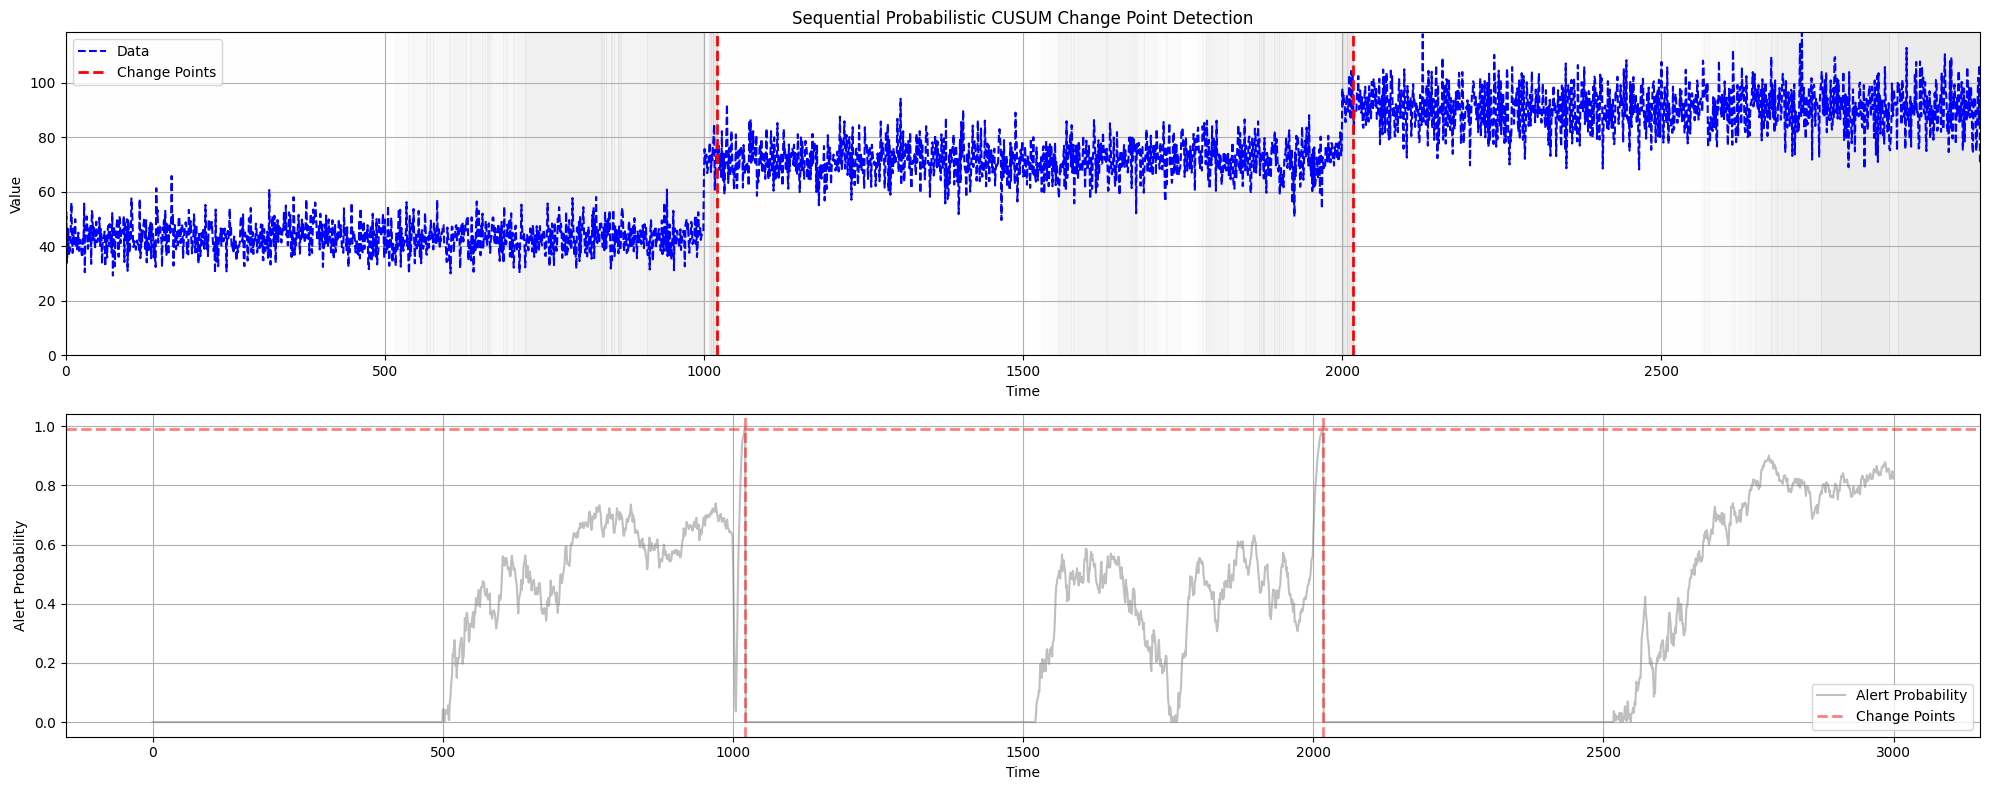

In [8]:
# Detect change points using Probabilistic CUSUM Detector
prob_cusum_detector = ProbCUSUM_Detector(warmup_period=500, threshold_probability=0.01)
results = prob_cusum_detector.offline_detection(generator.data)

# Plot the detected change points using Probabilistic CUSUM Detector
prob_cusum_detector.plot_change_points(generator.data, 
                                       results["change_points"], 
                                       results["probabilities"])

In [9]:
for data in generator.data:
    prob_change, is_change = prob_cusum_detector.detection(data)
    print(f"Change Detected: {is_change}\n -with Probability: {prob_change}")

Change Detected: False
 -with Probability: 0.7378636826369993
Change Detected: False
 -with Probability: 0.668395242634543
Change Detected: False
 -with Probability: 0.5450156463099223
Change Detected: False
 -with Probability: 0.4135221661597692
Change Detected: False
 -with Probability: 0.2883928615115152
Change Detected: False
 -with Probability: 0.1257748399859442
Change Detected: False
 -with Probability: 0.03899950202315772
Change Detected: False
 -with Probability: 0.19950248823168448
Change Detected: False
 -with Probability: 0.32928112866072445
Change Detected: False
 -with Probability: 0.42475724896726663
Change Detected: False
 -with Probability: 0.5427233177374204
Change Detected: False
 -with Probability: 0.6583103181555681
Change Detected: False
 -with Probability: 0.7385015218708313
Change Detected: False
 -with Probability: 0.8127819284245366
Change Detected: False
 -with Probability: 0.8670029506757815
Change Detected: False
 -with Probability: 0.9031589775831073
Chang

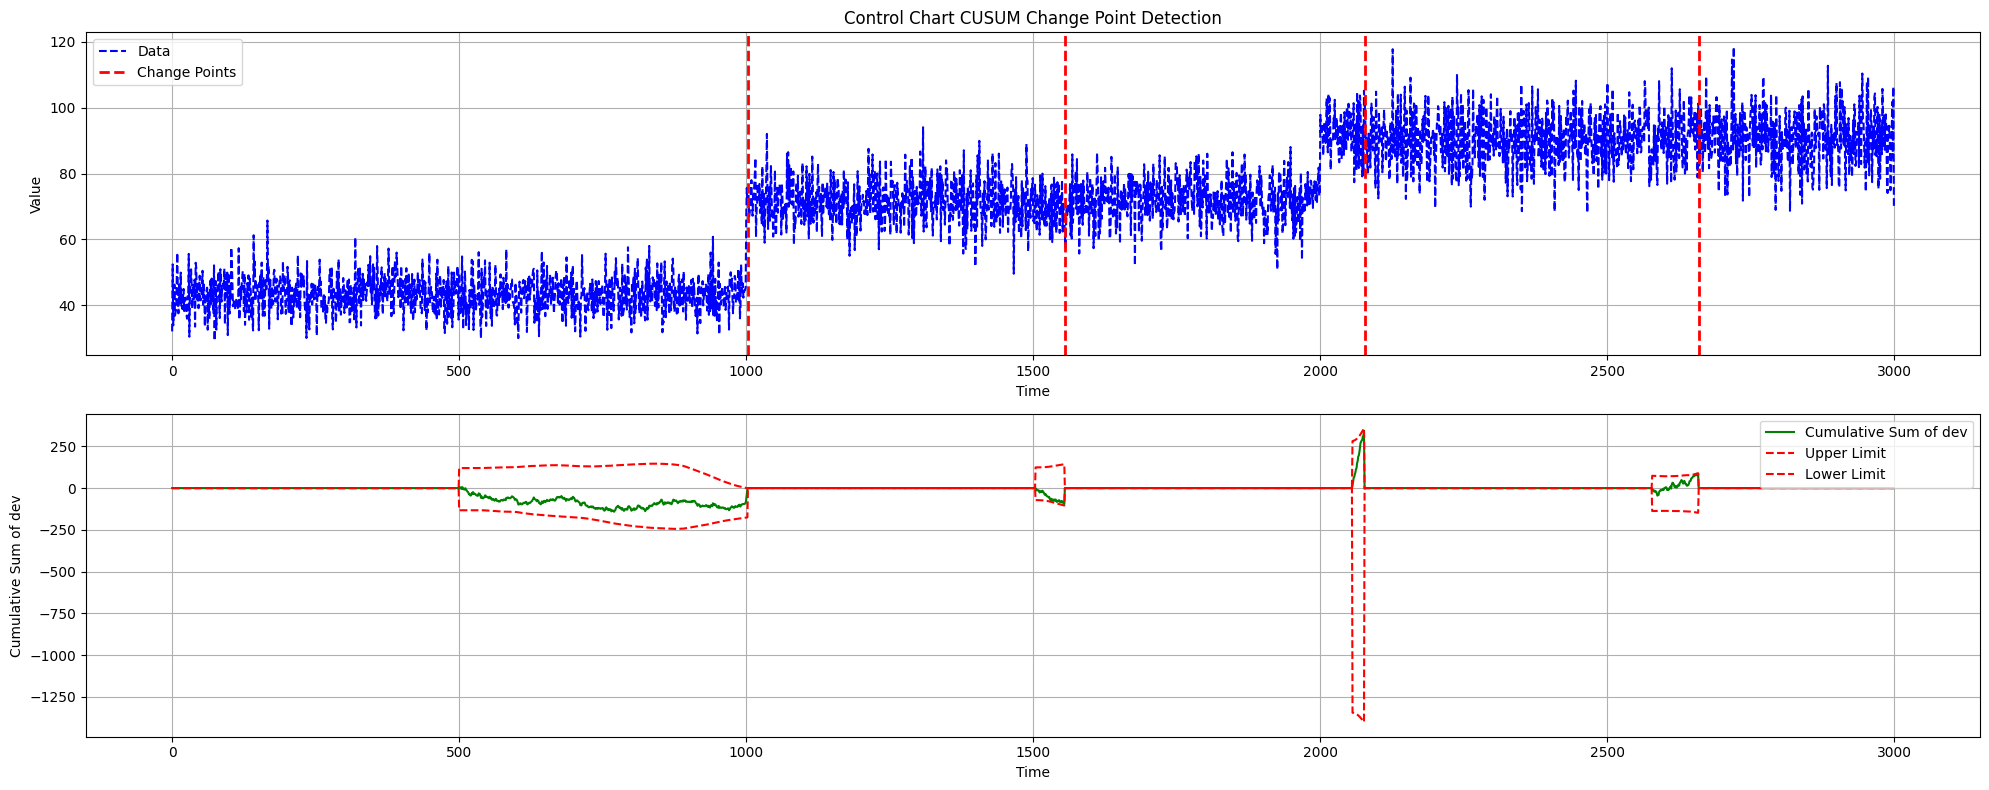

In [10]:
# Detect change points using Control Chart CUSUM Detector
chart_cusum_detector = ChartCUSUM_Detector(warmup_period=500, level=3, deviation_type='dev')
results = chart_cusum_detector.offline_detection(generator.data)

# Plot the detected change points using Control Chart CUSUM Detector
chart_cusum_detector.plot_change_points(generator.data, 
                                        results["change_points"], 
                                        results["cusums"], 
                                        results["upper_limits"], 
                                        results["lower_limits"])

In [11]:
for data in generator.data:
    ucl, lcl, value, is_change = chart_cusum_detector.detection(data)
    print(f"Change Detected: {is_change}\n -UCL: {ucl}, \n -LCL: {lcl}, \n -CUSUM Value: {value}")

Change Detected: False
 -UCL: 0, 
 -LCL: 0, 
 -CUSUM Value: 0
Change Detected: False
 -UCL: 0, 
 -LCL: 0, 
 -CUSUM Value: 0
Change Detected: False
 -UCL: 0, 
 -LCL: 0, 
 -CUSUM Value: 0
Change Detected: False
 -UCL: 0, 
 -LCL: 0, 
 -CUSUM Value: 0
Change Detected: False
 -UCL: 0, 
 -LCL: 0, 
 -CUSUM Value: 0
Change Detected: False
 -UCL: 0, 
 -LCL: 0, 
 -CUSUM Value: 0
Change Detected: False
 -UCL: 0, 
 -LCL: 0, 
 -CUSUM Value: 0
Change Detected: False
 -UCL: 0, 
 -LCL: 0, 
 -CUSUM Value: 0
Change Detected: False
 -UCL: 0, 
 -LCL: 0, 
 -CUSUM Value: 0
Change Detected: False
 -UCL: 0, 
 -LCL: 0, 
 -CUSUM Value: 0
Change Detected: False
 -UCL: 0, 
 -LCL: 0, 
 -CUSUM Value: 0
Change Detected: False
 -UCL: 0, 
 -LCL: 0, 
 -CUSUM Value: 0
Change Detected: False
 -UCL: 0, 
 -LCL: 0, 
 -CUSUM Value: 0
Change Detected: False
 -UCL: 0, 
 -LCL: 0, 
 -CUSUM Value: 0
Change Detected: False
 -UCL: 0, 
 -LCL: 0, 
 -CUSUM Value: 0
Change Detected: False
 -UCL: 0, 
 -LCL: 0, 
 -CUSUM Value: 0
Change D

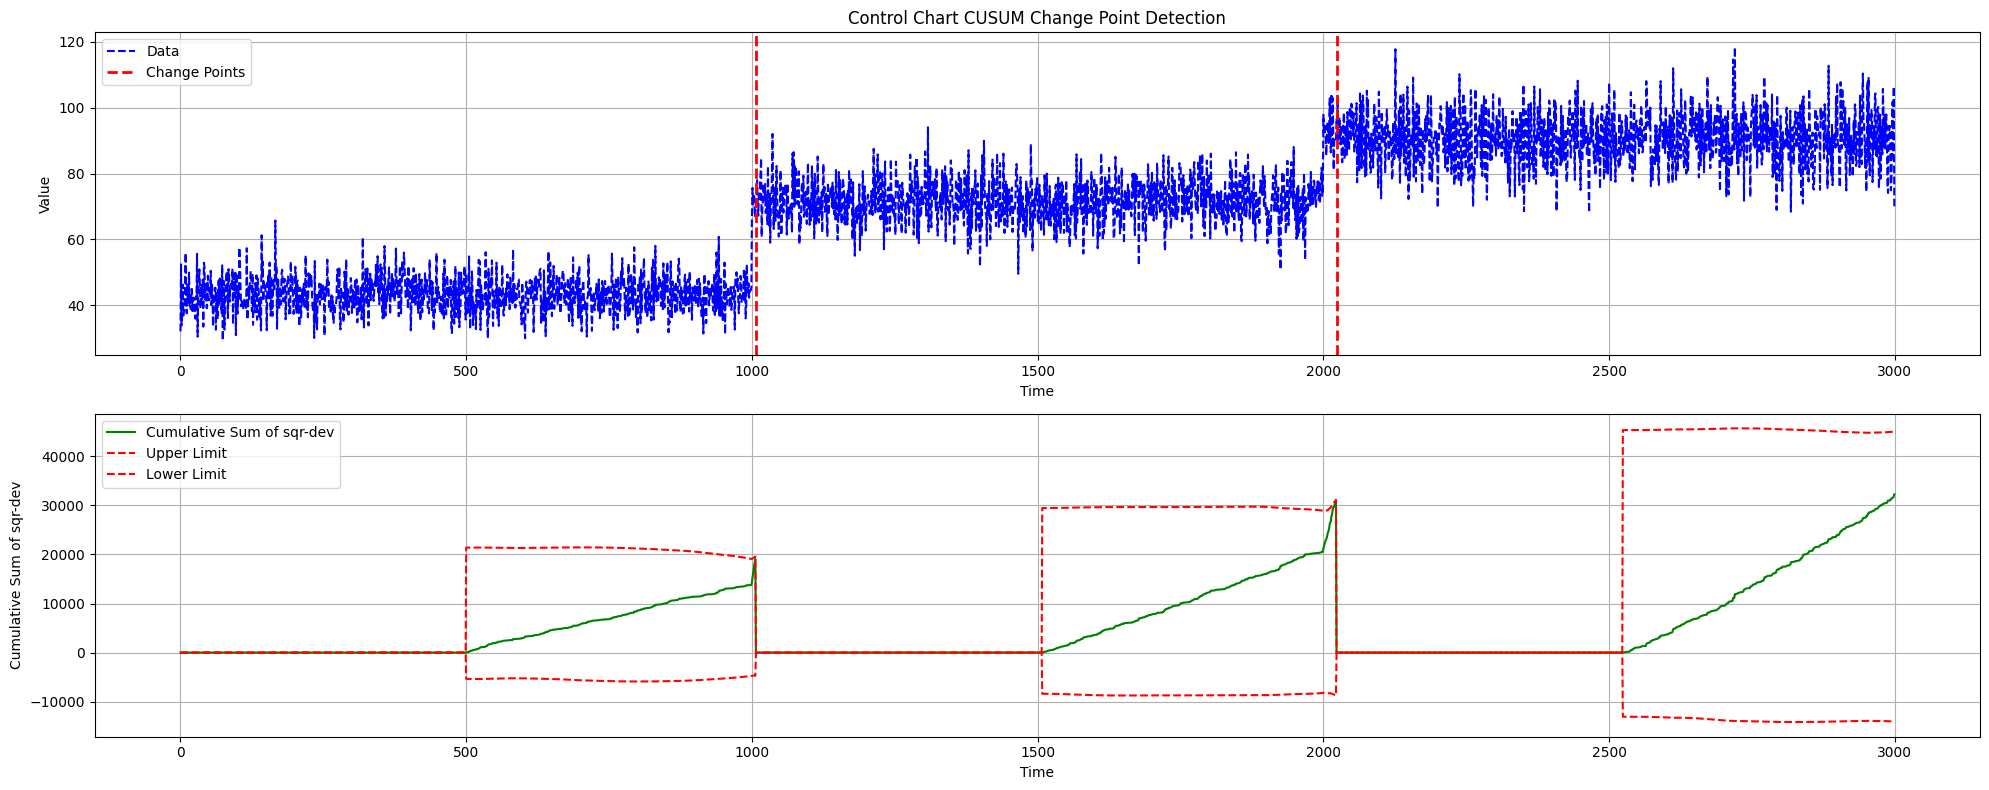

In [12]:
# Detect change points using Control Chart CUSUM Detector
chart_cusum_detector = ChartCUSUM_Detector(warmup_period=500, level=3, deviation_type='sqr-dev')
results = chart_cusum_detector.offline_detection(generator.data)

# Plot the detected change points using Control Chart CUSUM Detector
chart_cusum_detector.plot_change_points(generator.data,
                                        results["change_points"], 
                                        results["cusums"], 
                                        results["upper_limits"], 
                                        results["lower_limits"])

# Gradual drift

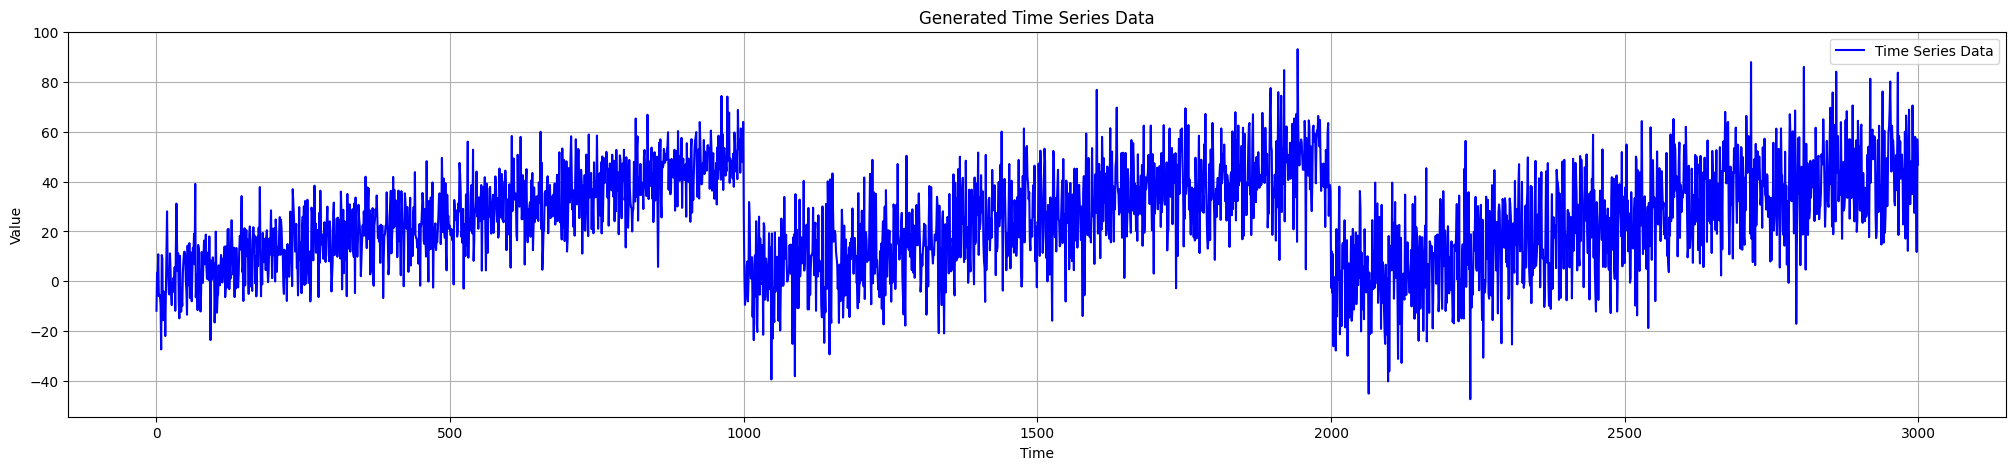

In [ ]:
# Generate time series data with change points
generator = ChangePointGenerator(num_segments=3, segment_length=1000, change_point_type='gradual_drift')
generator.generate_data()

# Plot the generated data
generator.plot_data()

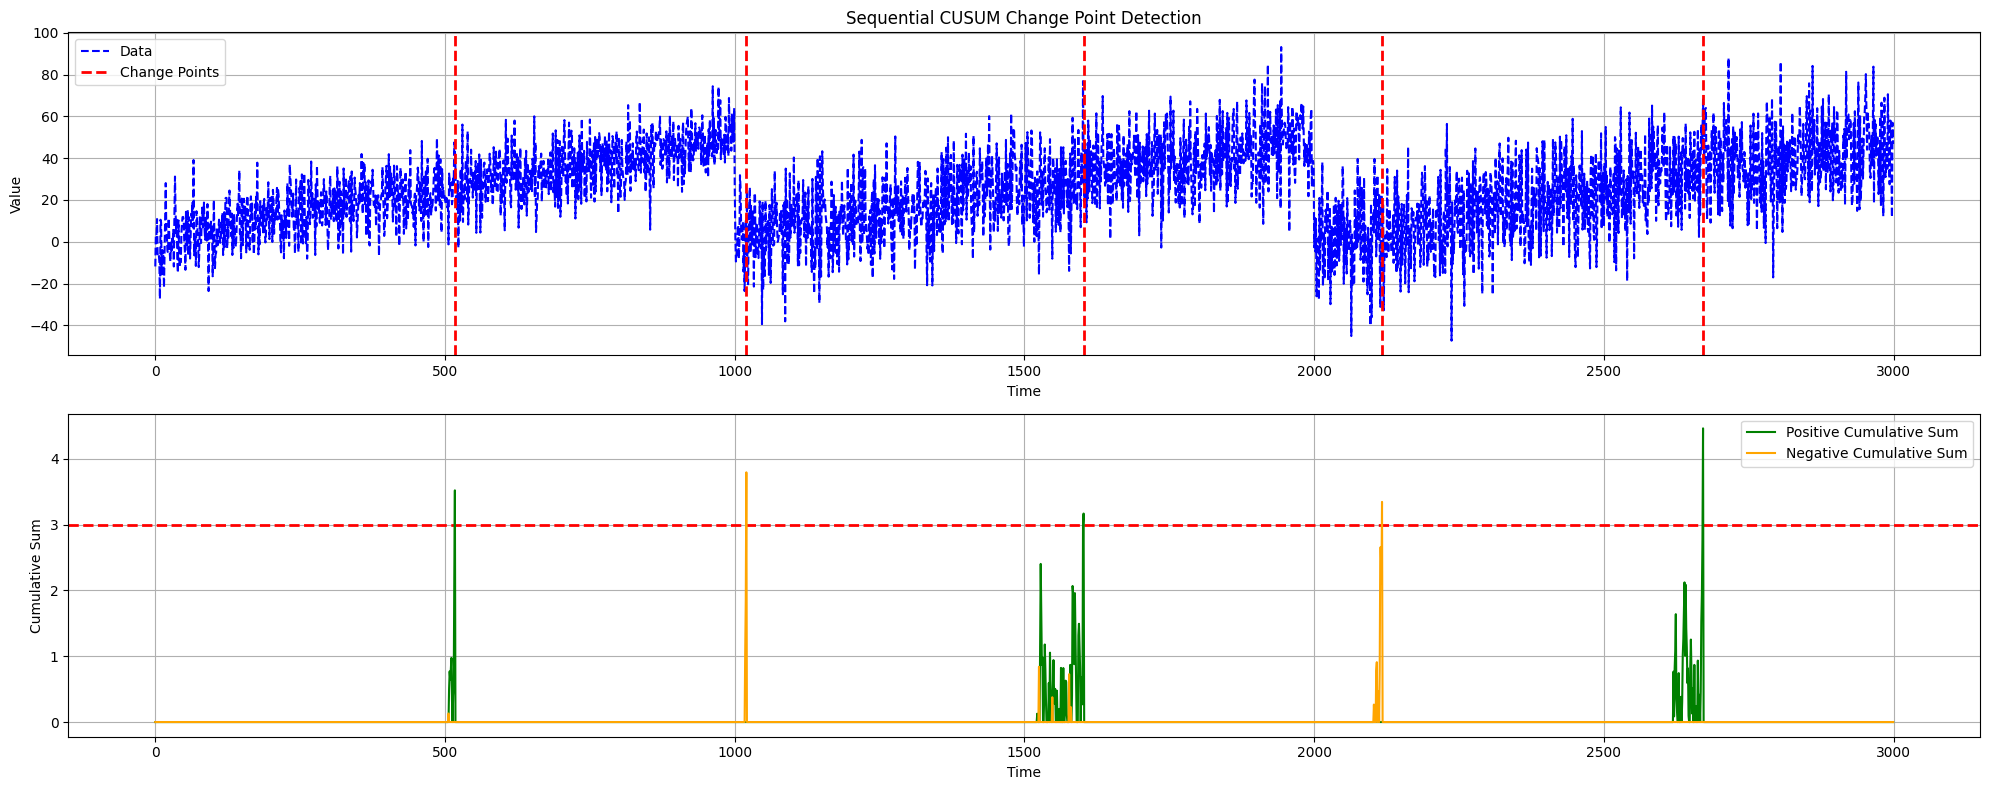

In [ ]:
# Detect change points using CUSUM Detector
cusum_detector = CUSUM_Detector(warmup_period=500, delta=1, threshold=3)
cusum_pos_changes, cusum_neg_changes, cusum_change_points = cusum_detector.offline_detection(generator.data)

# Plot the detected change points using CUSUM Detector
cusum_detector.plot_change_points(generator.data, cusum_change_points, cusum_pos_changes, cusum_neg_changes)

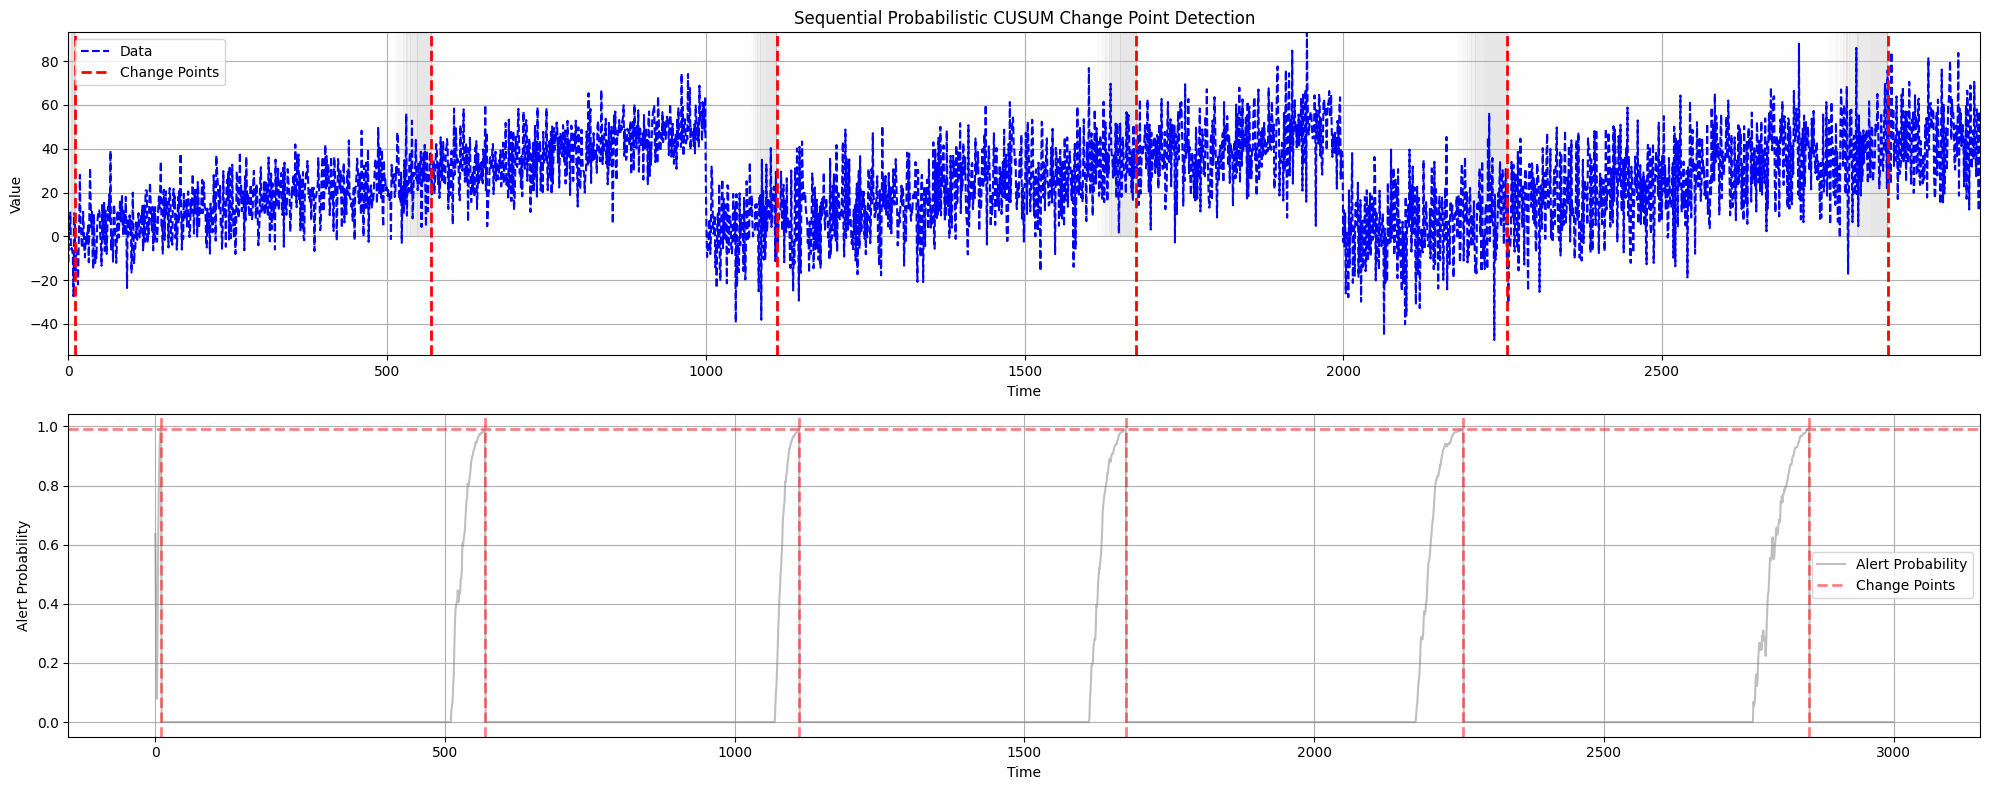

In [ ]:
# Detect change points using Probabilistic CUSUM Detector
prob_cususm_detector = ProbCUSUM_Detector(warmup_period=500, threshold_probability=0.01)
prob_probabilities, prob_change_points = prob_cusum_detector.offline_detection(generator.data)

# Plot the detected change points using Probabilistic CUSUM Detector
prob_cusum_detector.plot_change_points(generator.data, prob_change_points, prob_probabilities)

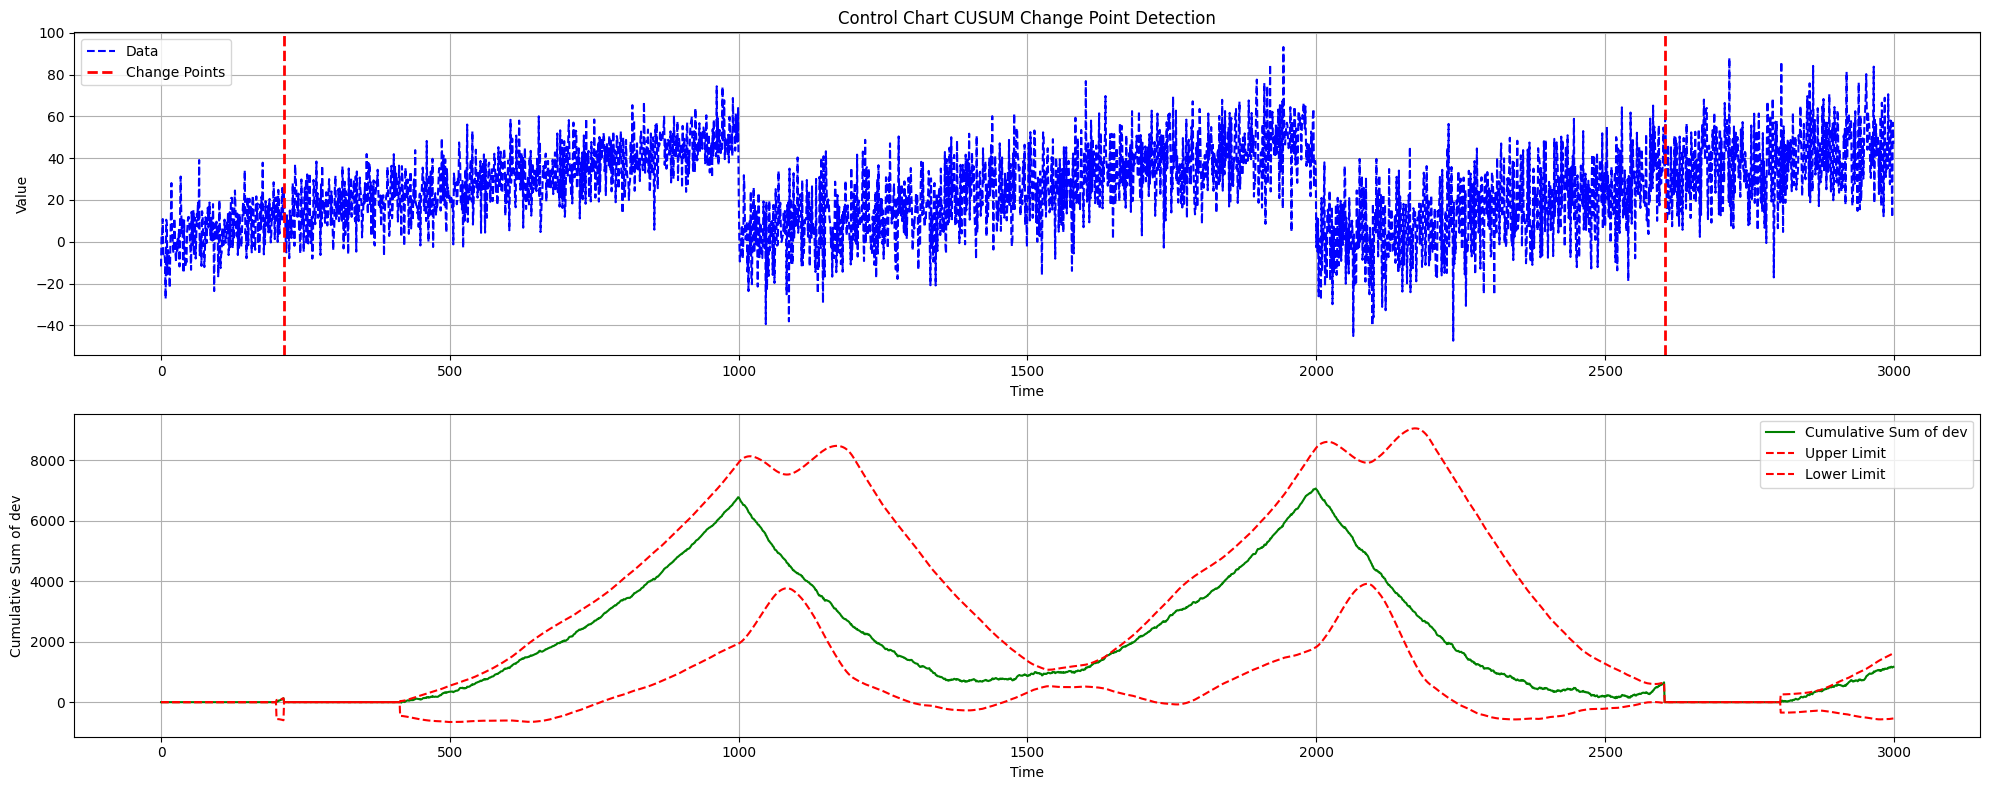

In [ ]:
# Detect change points using Control Chart CUSUM Detector
chart_cusum_detector = ChartCUSUM_Detector(warmup_period=200, level=3, deviation_type='dev')
upper_limits, lower_limits, cusums, change_points = chart_cusum_detector.offline_detection(generator.data)

# Plot the detected change points using Control Chart CUSUM Detector
chart_cusum_detector.plot_change_points(generator.data, change_points, cusums, upper_limits, lower_limits)

# Data with RANDOM missing values

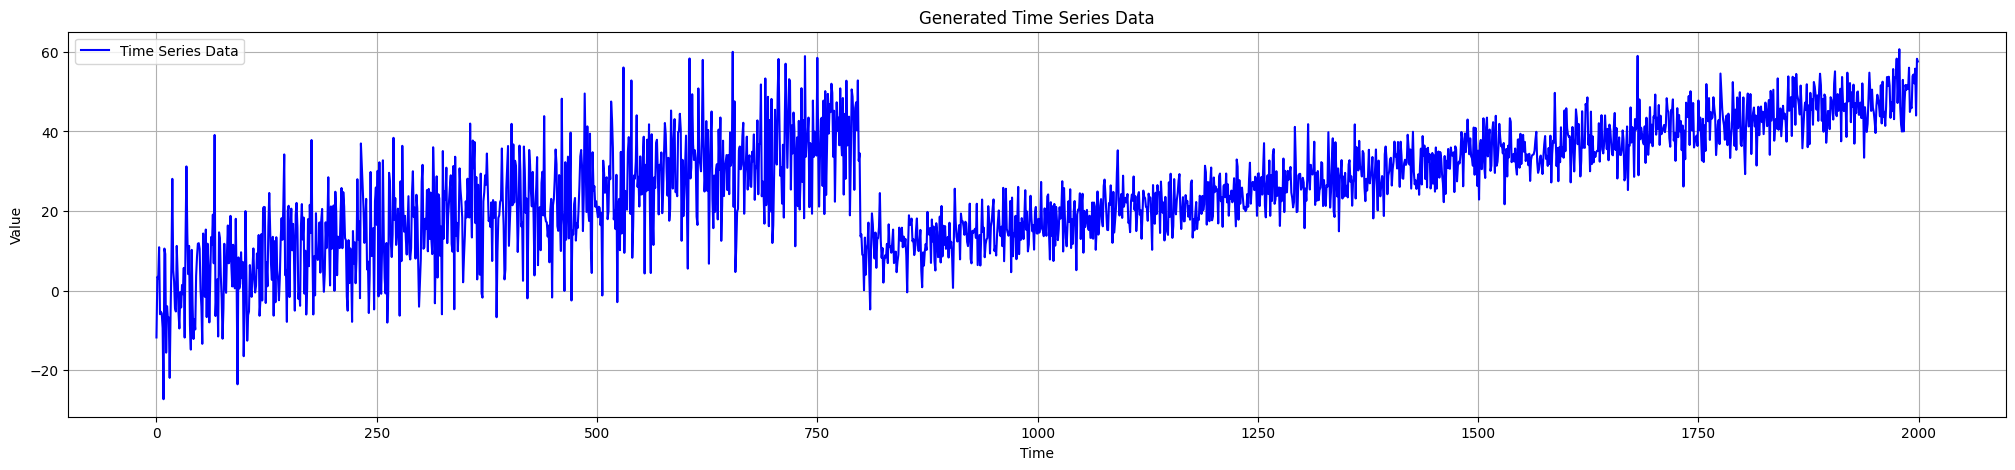

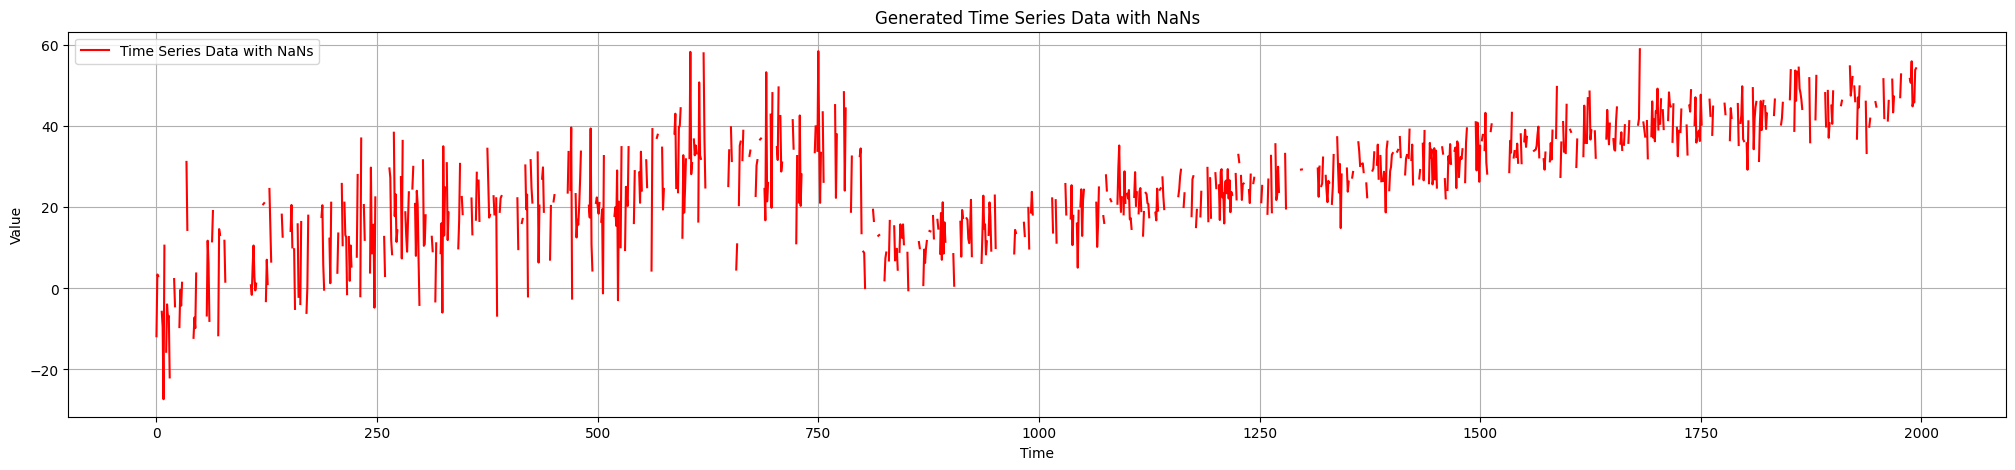

In [ ]:
generator = ChangePointGenerator(num_segments=2, segment_length=1000, change_point_type='gradual_drift')
generator.generate_data()
generator.add_gradual_drift(10, 50, 5, 800)
generator.plot_data()

nan_percentage = 0.45
data_with_nans = generator.generate_random_nans(nan_percentage)
generator.plot_data_with_nans(data_with_nans)

# Data with NOT RANDOM missing values

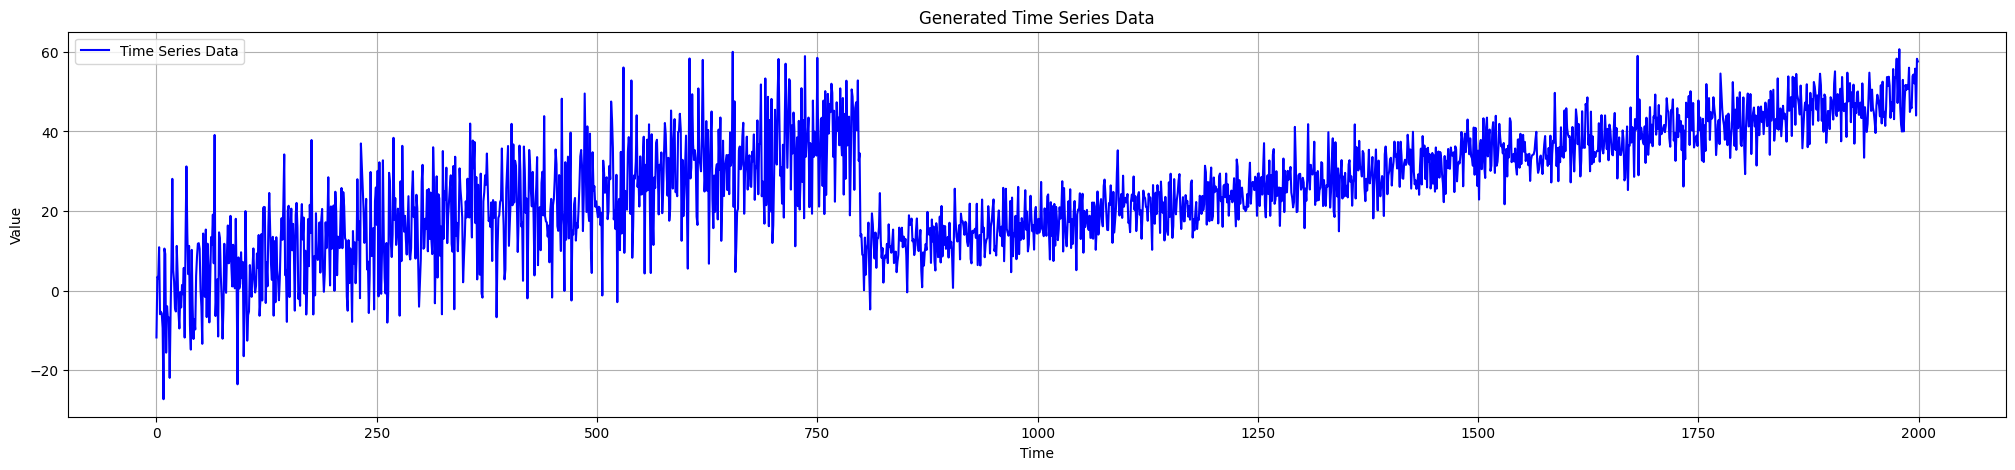

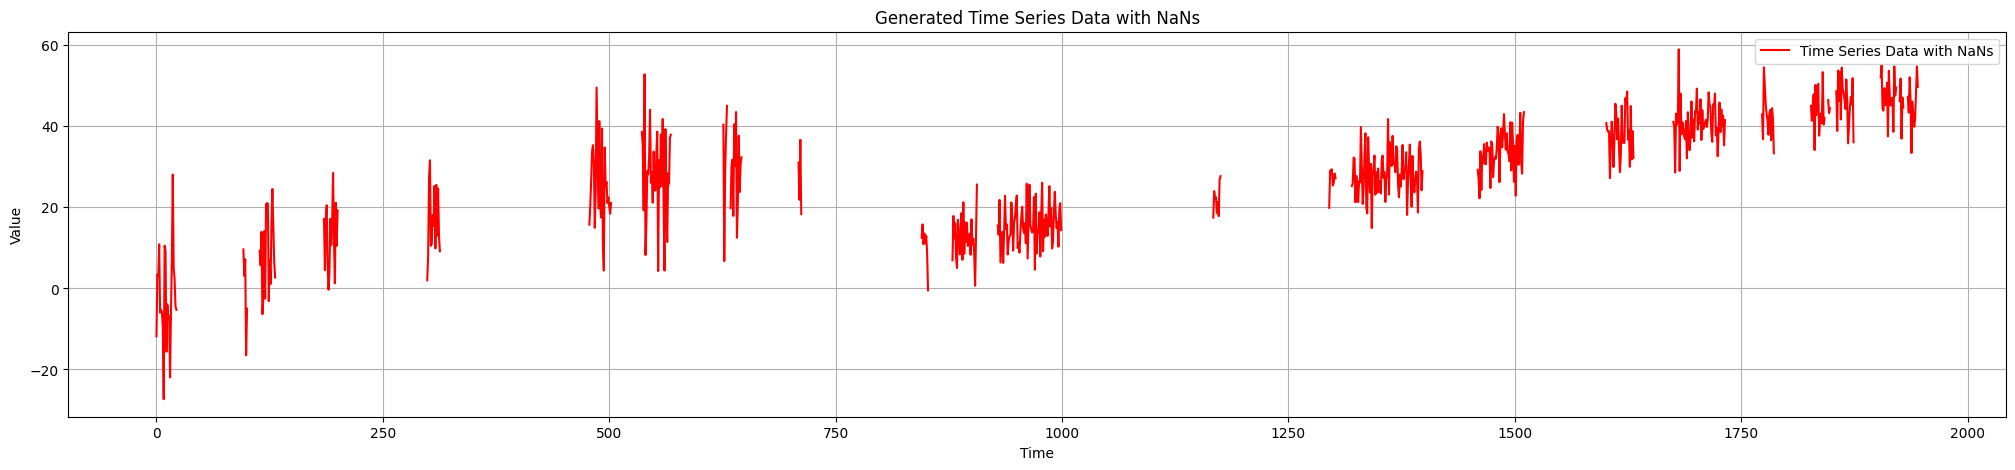

In [ ]:
generator = ChangePointGenerator(num_segments=2, segment_length=1000, change_point_type='gradual_drift')
generator.generate_data()
generator.add_gradual_drift(10, 50, 5, 800)
generator.plot_data()

nan_percentage = 0.1
min_block_size=2 
max_block_size=50
data_with_nans = generator.generate_no_random_nans(nan_percentage, min_block_size, max_block_size)
generator.plot_data_with_nans(data_with_nans)